### Desafio Guiado S5

In [2]:
sign_variables = {
'Income': 'Ingreso anual disponible en miles de dólares.',
'Limit': 'Límite del crédito.',
'Rating': 'Ranking del crédito.',
'Cards': 'Cantidad de tarjetas de crédito.',
'Age': 'Edad del usuario.',
'Education': 'Años de educación del usuario.',
'Gender': '¿Hombre o mujer?',
'Student': '¿Es estudiante?',
'Married': '¿Está casado?',
'Ethnicity': 'Etnicidad del usuario (Caucásico, Afroamericano, Asiatico',
'Balance': 'Promedio de deuda en tarjeta de crédito de usuario'}

### Req 1: Preparar el ambiente de trabajo 

* Importe las librerías básicas para el análisis de datos.
* Incluya los import base de statsmodels.

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

plt.style.use('seaborn-whitegrid') # Gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (6, 4) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 100 # resolución gráficos


* Importe la base de datos Credit.csv y elimine la columna Unnamed: 0.

In [4]:
df = pd.read_csv('Credit.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [90]:
df['Ethnicity'].unique()

array(['Caucasian', 'Asian', 'African American'], dtype=object)

In [5]:
df.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


* Siguiendo las buenas prácticas, genere variables binarias para capturar el efecto del grupo minoritario en cada variable. Para el caso de Ethnicity, genere binarias para African American,Caucasian y Asian.
    - Tip: Utilice value_counts() para revisar la cantidad de casos en las variables categóricas.

In [6]:
var_categoricas = ['Gender','Student','Married','Ethnicity']

In [7]:
for cat in var_categoricas:
    print(df[cat].value_counts())

Female    207
 Male     193
Name: Gender, dtype: int64
No     360
Yes     40
Name: Student, dtype: int64
Yes    245
No     155
Name: Married, dtype: int64
Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64


In [8]:
df[var_categoricas].head()

,Gender,Student,Married,Ethnicity
0,Male,No,Yes,Caucasian
1,Female,Yes,Yes,Asian
2,Male,No,No,Asian
3,Female,No,No,Asian
4,Male,No,Yes,Caucasian


In [9]:
rec_categoricas = pd.get_dummies(df[var_categoricas],
prefix=['Gender', 'Student', 'Married', 'Ethnicity'] ,
 drop_first=True,)
rec_categoricas

,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
0,0,0,1,0,1
1,1,1,1,1,0
2,0,0,0,1,0
3,1,0,0,1,0
4,0,0,1,0,1
...,...,...,...,...,...
395,0,0,1,0,1
396,0,0,0,0,0
397,1,0,1,0,1
398,0,0,1,0,1


In [10]:
df_bin = pd.concat([df, rec_categoricas], axis=1).copy()
df_bin.sample()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
204,57.337,5310,392,2,45,7,Female,No,No,Caucasian,456,1,0,0,0,1


In [11]:
var_bin= ['Gender_Female',
            'Student_Yes',
            'Married_Yes']
for var in var_bin:
    print(f'''{var}
{df_bin[var].value_counts()}
----------------------------''')

Gender_Female
1    207
0    193
Name: Gender_Female, dtype: int64
----------------------------
Student_Yes
0    360
1     40
Name: Student_Yes, dtype: int64
----------------------------
Married_Yes
1    245
0    155
Name: Married_Yes, dtype: int64
----------------------------


In [12]:
var_bin_etnic = ['Ethnicity_Asian', 'Ethnicity_Caucasian']
df_bin[var_bin_etnic].value_counts()
# African American 0 , 0

Ethnicity_Asian  Ethnicity_Caucasian
0                1                      199
1                0                      102
0                0                       99
dtype: int64

### Req 2: Generar gráficos descriptivos para las variables continuas 

* Genere una función llamada plot_hist que genere un histograma de la variable e indique la media y mediana de la misma. Agregue una leyenda para indicar qué representa cada línea.

In [13]:
v_continuas = ['Income',
	'Limit',
	'Rating',
	'Cards',
	'Age',
	'Education',
	'Gender']


In [14]:
def plot_hist(df, variable):
    tmp = df[variable].copy()
    fig, ax = plt.subplots(ncols=1, sharex=True ,sharey=True)

    sns.histplot(tmp, ax=ax, color='yellow', label=variable, stat='count')
    ax.vlines(tmp.mean(),*ax.get_ylim(),color='green',alpha=0.6,ls='--', linewidth=2, label=f'media {tmp.mean():.2f}')
    ax.vlines(tmp.median(), *ax.get_ylim(), color='orchid',alpha=0.6,ls='--', linewidth=2, label=f'mediana {tmp.median():.2f}')
    ax.set_title(f'{variable}')
    plt.legend()

* ¿Cuál es el comportamiento de Balance, Income, Cards y Rating?

* En income podemos ver como la media se ve desplazada por los valores altos llegando a sobrepasar por 12 puntos a la mediana.
* Balance se comporta de manera similar a incom, sin embargo los eventos se encuentran mas agrupados, seguramente por su naturaleza
* En cards la media con la mediana son similares ya que el 2.96 se puede aproximar a 3.
* Rating es la unica variable que se podria aproximar mas a una curva normal, de igual forma posee valores extremos hacia arriba.

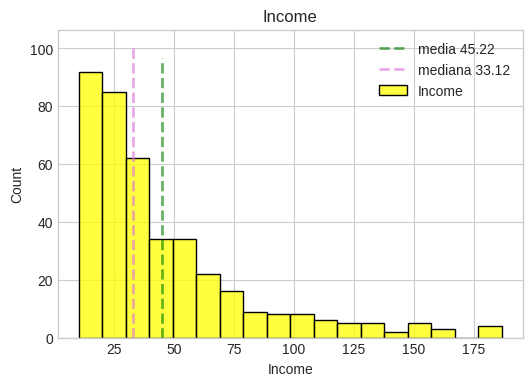

In [15]:
plot_hist(df, 'Income')

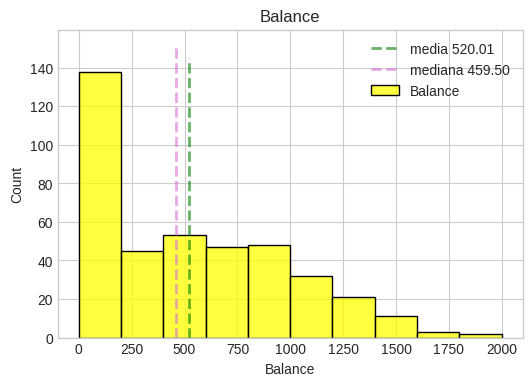

In [16]:
plot_hist(df, 'Balance')

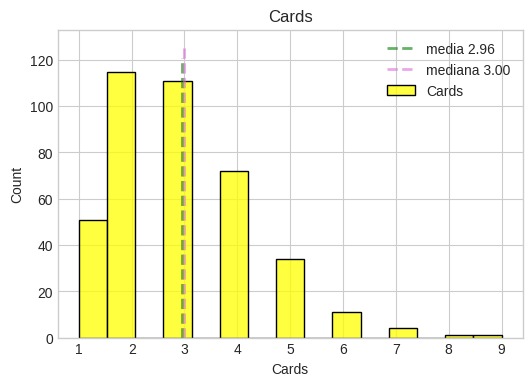

In [17]:
plot_hist(df, 'Cards')

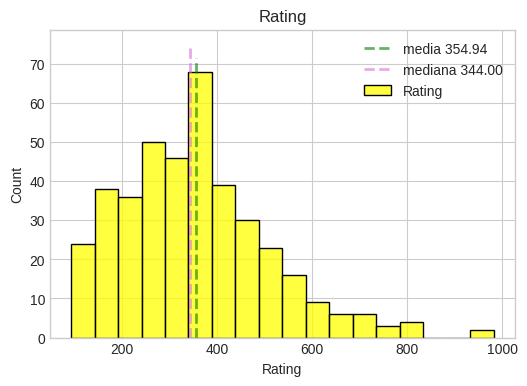

In [18]:
plot_hist(df, 'Rating')

### Req 3 Regresion lineal Simple

* Generar una serie de modelos simples:

            - 𝐵𝑎𝑙𝑎𝑛𝑐𝑒 = β0+γ1·𝑆𝑡𝑢𝑑𝑒𝑛𝑡+ε
            - 𝐵𝑎𝑙𝑎𝑛𝑐𝑒 = β0+β·𝐼𝑛𝑐𝑜𝑚𝑒+ε
            - 𝐵𝑎𝑙𝑎𝑛𝑐𝑒 = β0+β·𝑅𝑎𝑡𝑖𝑛𝑔+ε

In [20]:
model = smf.ols('Balance ~ Student_Yes', data=df_bin).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           1.49e-07
Time:                        18:22:04   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     480.3694     23.434     20.499      0.000     434.300     526.439
Student_Yes   396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
r_student = [0.067 , (1.49*10**-7)]

In [ ]:
model = smf.ols('Balance ~ Income', data=df_bin).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           1.03e-22
Time:                        23:06:35   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.975
Skew:                           0.384   Prob(JB):                     2.79e-05
Kurtosis:                       2.182   Cond. No.                         93.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
r_income = [0.215 , (1.03*10**-22)]

In [ ]:
model = smf.ols('Balance ~ Rating', data=df_bin).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          1.90e-120
Time:                        23:06:48   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -390.8463     29.069    -13.446      0.000    -447.993    -333.699
Rating         2.5662      0.075     34.176      0.000       2.419       2.714
==============================================================================
Omnibus:                       23.223   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.802
Skew:                           0.390   Prob(JB):                     3.75e-09
Kurtosis:                       4.311   Cond. No.                         970.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
r_rating = [0.746 , (1.90*10**-120)]
resultados = [r_student] + [r_income] + [r_rating]
resultados

[[0.067, 1.49e-07], [0.215, 1.0300000000000001e-22], [0.746, 1.9e-120]]

In [40]:
mejor_modelo = [ 0, 0 ]
indice = []
for r in resultados:
    tmp = 0
    if r[0]>tmp:
        mejor_modelo[0] = r[0]
        tmp = r[0]
for r in resultados:
    tmp = 10
    if r[1]<tmp:
        mejor_modelo[1] = r[1]
        tmp = r[1]
mejor_modelo


[0.746, 1.9e-120]

* Utilizando statsmodels, comente brevemente los siguientes puntos:
    - ¿Qué variable presenta un mayor poder explicativo de la variabilidad de
    Balance?
    - ¿Qué podemos decir sobre el comportamiento de Student?

 La variable que mas representa a Balance es Rating con un valor de R de 74,6% y un prob de F muy cercano a 0 (1.9e-120) por ende rechazamos la hipotesis nula que nos dice que no hay valores significativos en nuestra regresion

La variable Student solo explica en un 6,7% el comportamiento de balance, por ende no es mayormente significativa, a un que de todas formas este relacionada. Por otro lado al ser una variable Binaria la dispercion podemos ver el grafico de correlacion para observar de manera grafica como se comporta.

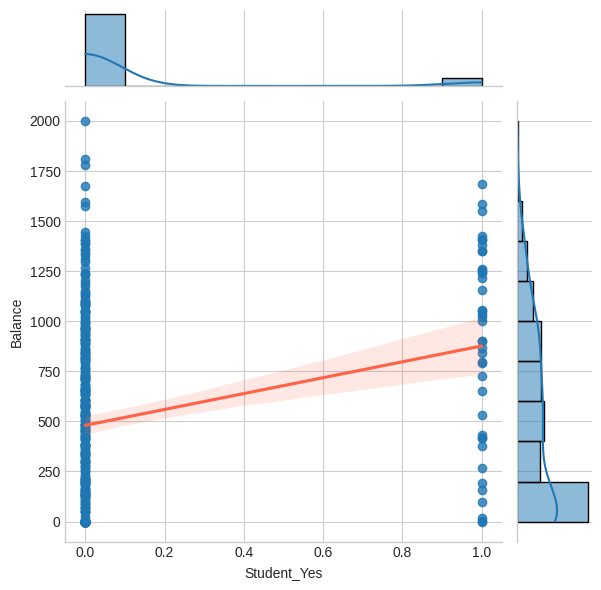

In [51]:
sns.jointplot(data=df_bin, x='Student_Yes', y='Balance', kind='reg', line_kws={'color':'tomato'})

Se observa que para quienes si son estudiantes se reporta una mayor deuda en su tarjeta de credito.

* ¿Qué pasa si aplicamos una prueba de hipótesis para muestras independientes de Balance entre aquellos que son y no son estudiantes?

* $H{o}$ : No hay diferencia entre la media de los estudiantes vs. los no estudiantes
* $H{1}$ : Hay diferencia significativa entre la media de los estudiantes vs. los no estudiantes

In [81]:
def prueba_hip_est(df, variable, significacion=0.05):
    estudiantes = df_bin.query('Student_Yes == 1')
    no_estudiantes = df_bin.query('Student_Yes == 0')
    diff = no_estudiantes[variable].mean() - estudiantes[variable].mean()

    puntaje_t, p_value = stats.ttest_ind(estudiantes[variable],no_estudiantes[variable])
    evaluar_p = p_value<=significacion
    resultado = ['Rechazo' if evaluar_p else 'No rechazo']
    print(f'''
    Variable: {variable} 
    ------------------------------------------------------
    Media Estudiantes: {np.round(estudiantes[variable].mean(),3)}
    Media no Estudiantes: {np.round(no_estudiantes[variable].mean(),3)}
    Diferencia entre medias: {np.round(diff,3)}
    Funcion ttest para medias independientes
    estadistico t: {puntaje_t}
    p value: {p_value} <= {significacion}: {p_value<=significacion}
    {resultado[0]} H0: No hay diferencia entre la media de 
                los estudiantes vs. los no estudiantes
    ------------------------------------------------------
    ''')

In [82]:
prueba_hip_est(df_bin, 'Balance')


    Variable: Balance 
    ------------------------------------------------------
    Media Estudiantes: 876.825
    Media no Estudiantes: 480.369
    Diferencia entre medias: -396.456
    Funcion ttest para medias independientes
    estadistico t: 5.3499641230750035
    p value: 1.4877341077322994e-07 <= 0.05: True
    Rechazo H0: No hay diferencia entre la media de 
                los estudiantes vs. los no estudiantes
    ------------------------------------------------------
    


Con el test de Hipotesis rechazamos nuestra $H{o}$ lo que nos acerca a la $H{1}$ y nos confirma que a pesar de ser debil como vimos anteriormente (6,7% relacionada), existe una relacion entre Student y Balance

### Req 4: Generar un modelo que incluya todos los regresores

* A partir de la siguiente fórmula, genere el modelo que incluya dichos regresores y comente brevemente sobre el poder explicativo en la varianza de y las principales𝑦 características de los predictores.

![Formula rgm](formula_r4.png "Formula Reg multiple")

In [83]:
df_bin.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance', 'Gender_Female',
       'Student_Yes', 'Married_Yes', 'Ethnicity_Asian', 'Ethnicity_Caucasian'],
      dtype='object')

In [84]:
'''
Income
Limit
Rating
Cards
Age
Education
Gender_Female
Student_Yes
Married_Yes
Ethnicity_Asian
Ethnicity_Caucasian
'''


In [107]:
model2 = smf.ols(f'Balance ~Income+ Limit+ Rating+ Cards+ Age+ Education+ Gender_Female+ Student_Yes+ Married_Yes+ Ethnicity_Asian+ Ethnicity_Caucasian',
data=df_bin).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          1.11e-253
Time:                        22:18:49   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -479.2079     35.774    -13.395      0.000    -549.543    -408.873
Income                 -7.8031      0.234    -33.314      0.000      -8.264      -7.343
Limit                   0.1909      0.033      5.824      0.000       0.126       0.255
Rating                  1.1365      0.491      2.315      0.021       0.171       2.102
Cards                  17.7245      4.341      4.083      0.000       9.190      26.259
Age                    -0.6139      0.294     -2.088      0.037      -1.192      -0.036
Education              -1.0989      1.598     -0.688      0.492      -4.241       2.043
Gender_Female         -10.6532      9.914     -1.075      0.283     -30.145       8.839
Student_Yes           425.7474     16.723     25.459      0.000     392.869     458.626
Married_Yes            -8.5339     10.363     -0.824      0.411     -28.908      11.841
Ethnicity_Asian        16.8042     14.119      1.190      0.235     -10.955      44.564
Ethnicity_Caucasian    10.1070     12.210      0.828      0.408     -13.899      34.113
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     3.87e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Nuestro modelo presenta un nivel explicativo bastante alto si miramos el valor de R-Squared, llegando al 95% y un p(f-statistic) muy cercano a 0 (1.11e-253) 

* Dadas las variables ingresadas la regresion corta el eje Y en -479.2 dolares de deuda
* Tenemos parametros que no aportan nada, que vendrian siendo quienes poseen un p-valor mayor a 0.05 o para este caso nos piden el 0.025. lo que implica las siguientes variables:

                        - Ethnicity_Asian	    0.235
                        - Ethnicity_Caucasian   0.408
                        - Age                   0.037
                        - Education             0.492
                        - Gender_Female         0.283
                        - Married_Yes           0.411


* Por otro lado tenemos las variables que si significan para el modelo:
    - Income: por 1 unidad marginal en income Balance varia en -7.8031 usd
    - Limit: por 1 unidad marginal en Limir Balance varia en 0.1909 usd
    - Rating: por 1 unidad marginal en Rating Balance varia en 1.1365 usd
    - Cards: por 1 unidad marginal en Cards Balance varia en 17.7245 usd
    - Student_Yes: por 1 unidad marginal en Student_Yes Balance varia en 425.7474 usd


### Req 5: Depurar el modelo e incluya sólo los predictores significativo 

* En base al modelo anterior, refactoriza e incluya sólo lasvariablesconunnivel de significancia . Comente brevemente sobre el poder𝑝−𝑣𝑎𝑙𝑢𝑒≤.025 explicativo en la varianza de y las principales características de los𝑦 predictores.

In [105]:
model3 = smf.ols('Balance ~Income+ Limit+ Rating+ Cards+ Student_Yes',
data=df_bin).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1640.
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          3.60e-261
Time:                        22:06:42   Log-Likelihood:                -2402.8
No. Observations:                 400   AIC:                             4818.
Df Residuals:                     394   BIC:                             4842.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -526.1555     19.747    -26.645      0.000    -564.977    -487.334
Income         -7.8749      0.231    -34.024      0.000      -8.330      -7.420
Limit           0.1944      0.033      5.977      0.000       0.130       0.258
Rating          1.0879      0.487      2.234      0.026       0.130       2.045
Cards          17.8517      4.335      4.118      0.000       9.329      26.374
Student_Yes   426.8501     16.574     25.754      0.000     394.266     459.435
==============================================================================
Omnibus:                       30.263   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.257
Skew:                           0.722   Prob(JB):                     2.21e-08
Kurtosis:                       3.179   Cond. No.                     2.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* ¿Mejoró o empeoró el modelo con la reducción de regresores?

* AIC sirve como métrica para selección de modelos, interesandonos siempre el modelo con menor AIC de entre los modelos candidatos

Segun el indicador AIC en donde buscamos el menor AIC, tenemos en el primer modelo 4821 y en el segundo 4818, por ende el menor vendria siendo el segundo modelo. Tambien en el segundo modelo podemos ver el p(F-statistic) con un valor menor que el primero 
3.60e-261 vs 1.11e-253 del primer modelo

### Req 6: Utilizando lmplot de seaborn, inspeccione el comportamiento de los tres principales determinantes

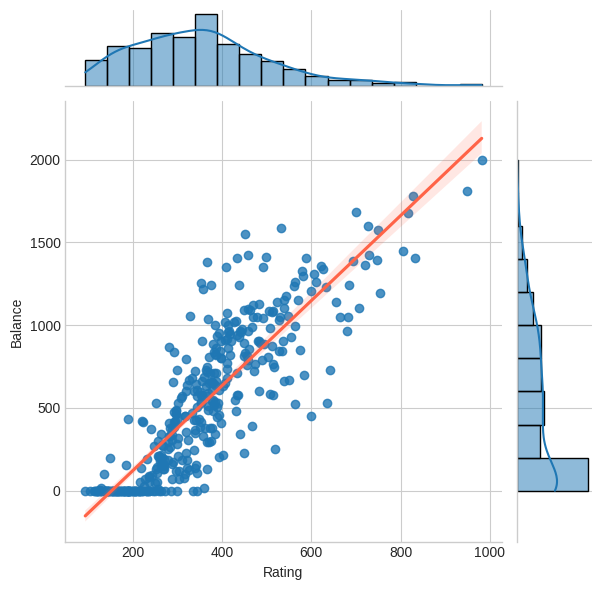

In [106]:
sns.jointplot(data=df_bin, x='Rating', y='Balance', kind='reg', line_kws={'color':'tomato'})

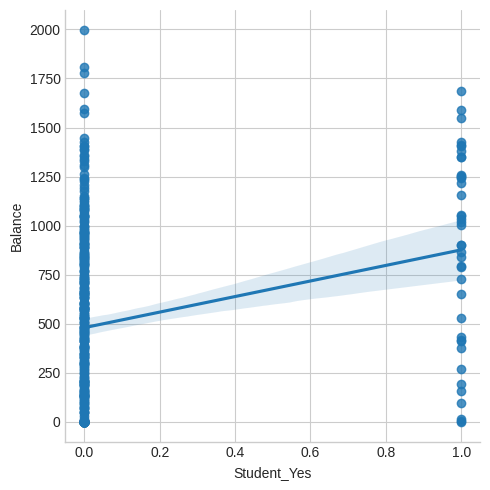

In [110]:
sns.lmplot(data=df_bin, x='Student_Yes', y='Balance')

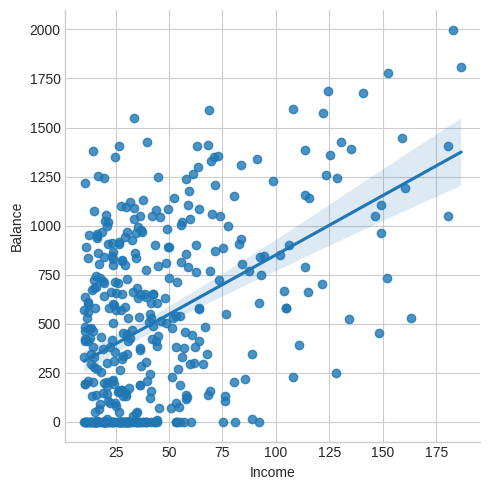

In [111]:
sns.lmplot(data=df_bin, x='Income', y='Balance')

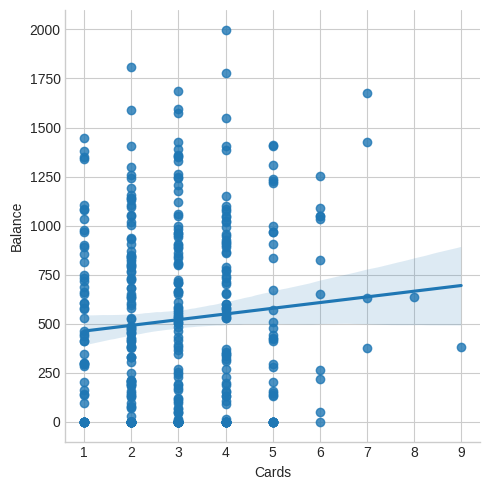

In [112]:
sns.lmplot(data=df_bin, x='Cards', y='Balance')